Author: Yash Singh                       
Name: IRIS FLOWER CLASSIFICATION

*IMPORTING IMPORTANT LIBRARIES*

In [42]:
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from mpl_toolkits.mplot3d import Axes3D
from sklearn.metrics import confusion_matrix

*DOWNLOADING DATASETS*


In [6]:
df = sns.load_dataset('iris')
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
5,5.4,3.9,1.7,0.4,setosa
6,4.6,3.4,1.4,0.3,setosa
7,5.0,3.4,1.5,0.2,setosa
8,4.4,2.9,1.4,0.2,setosa
9,4.9,3.1,1.5,0.1,setosa


In [10]:
df['species'],categories = pd.factorize(df['species'])
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
5,5.4,3.9,1.7,0.4,0
6,4.6,3.4,1.4,0.3,0
7,5.0,3.4,1.5,0.2,0
8,4.4,2.9,1.4,0.2,0
9,4.9,3.1,1.5,0.1,0


In [4]:
df.describe

<bound method NDFrame.describe of      sepal_length  sepal_width  petal_length  petal_width  species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]>

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

*Hence its time to visualize the data*

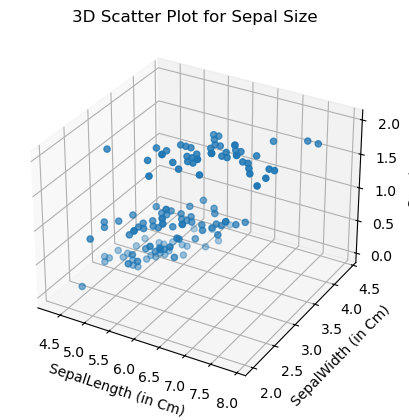

In [18]:
fig = plt.figure()
rep = fig.add_subplot(111, projection='3d')
rep.scatter(df.sepal_length, df.sepal_width, df.species)
rep.set_xlabel('SepalLength (in Cm)')
rep.set_ylabel('SepalWidth (in Cm)')
rep.set_zlabel('Species')
plt.title('3D Scatter Plot for Sepal Size')
plt.show()

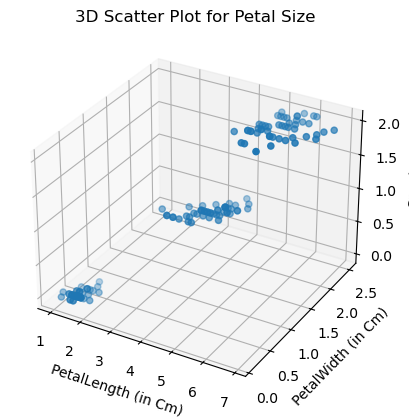

In [20]:
fig = plt.figure()
rep = fig.add_subplot(111, projection='3d')
rep.scatter(df.petal_length, df.petal_width, df.species)
rep.set_xlabel('PetalLength (in Cm)')
rep.set_ylabel('PetalWidth (in Cm)')
rep.set_zlabel('Species')
plt.title('3D Scatter Plot for Petal Size')
plt.show()

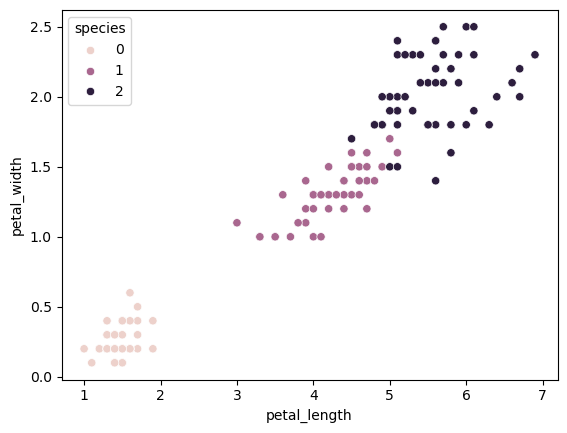

In [24]:
sns.scatterplot(data = df, x = "petal_length", y = "petal_width", hue = "species");

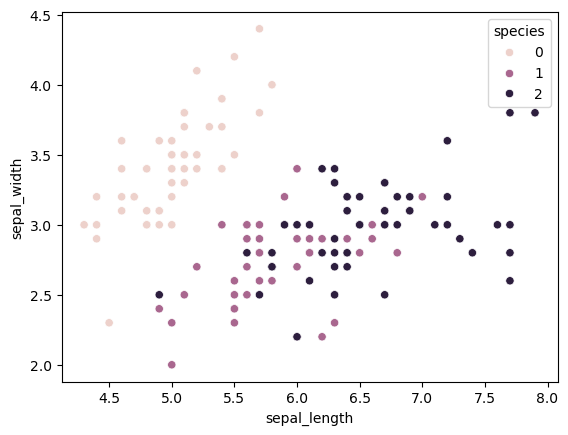

In [28]:
sns.scatterplot(data = df, x = "sepal_length", y = "sepal_width", hue = "species");

***Applying Elbow Technique***

In [32]:
rng = range(1,10)
emp = []

for a in rng:
  km = KMeans(n_clusters = a)
  km.fit(df[[ 'petal_length', 'petal_width']])
  emp.append(km.inertia_)

C:\Users\sy300\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sy300\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sy300\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\sy300\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Window

In [34]:
emp

[550.8953333333334,
 86.39021984551397,
 31.41288566827698,
 20.299607803485404,
 14.067949656750574,
 11.069355522773373,
 9.514603870788083,
 7.672362403043181,
 6.541584461432287]

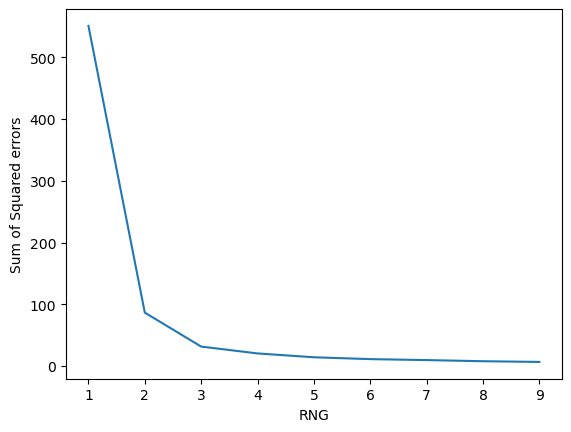

In [36]:
plt.xlabel('RNG')
plt.ylabel("Sum of Squared errors")
plt.plot(rng, emp)

In [38]:
km = KMeans(n_clusters = 4, random_state = 0,)
y_predicted = km.fit_predict(df[['petal_length','petal_width']])
y_predicted

C:\Users\sy300\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1446: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 3, 3, 3, 0, 3, 3, 3, 0, 3, 0, 0, 0, 0, 3, 0, 3,
       3, 0, 3, 0, 3, 0, 3, 3, 0, 3, 3, 3, 3, 0, 0, 0, 0, 3, 3, 3, 3, 0,
       0, 0, 0, 3, 0, 0, 0, 0, 0, 0, 0, 0, 2, 3, 2, 2, 2, 2, 3, 2, 2, 2,
       3, 2, 2, 3, 2, 2, 2, 2, 2, 3, 2, 3, 2, 3, 2, 2, 3, 3, 2, 2, 2, 2,
       2, 3, 2, 2, 2, 2, 3, 2, 2, 2, 3, 2, 2, 2, 3, 3, 2, 3])

In [40]:
df['cluster'] = y_predicted
df.head(15)

,sepal_length,sepal_width,petal_length,petal_width,species,cluster
0,5.1,3.5,1.4,0.2,0,1
1,4.9,3.0,1.4,0.2,0,1
2,4.7,3.2,1.3,0.2,0,1
3,4.6,3.1,1.5,0.2,0,1
4,5.0,3.6,1.4,0.2,0,1
5,5.4,3.9,1.7,0.4,0,1
6,4.6,3.4,1.4,0.3,0,1
7,5.0,3.4,1.5,0.2,0,1
8,4.4,2.9,1.4,0.2,0,1
9,4.9,3.1,1.5,0.1,0,1


Accuracy measure

In [46]:
con = confusion_matrix(df.species, df.cluster)

In [48]:
con

array([[ 0, 50,  0,  0],
       [27,  0,  0, 23],
       [ 0,  0, 35, 15],
       [ 0,  0,  0,  0]], dtype=int64)

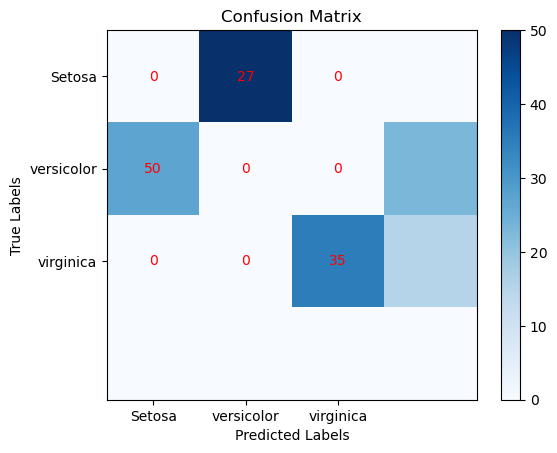

In [54]:
true = df.species
predicted = df.cluster

con = confusion_matrix(true, predicted)
class_labels = ['Setosa', 'versicolor', 'virginica']

plt.imshow(con, interpolation = 'nearest', cmap = plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(class_labels))
plt.xticks(tick_marks, class_labels)
plt.yticks(tick_marks, class_labels)

for a in range(len(class_labels)):
    for b in range(len(class_labels)):
        plt.text(a, b, str(con[a][b]), ha = 'center', va = 'center', color = 'red')

plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()



In [60]:
x = df.drop(columns = 'species')
y = df['species']

In [62]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size = 0.5)

In [70]:
LR = LogisticRegression()
LR.fit(x_train,y_train)

LogisticRegression()

In [72]:
KNN = KNeighborsClassifier()
KNN.fit(x_train,y_train)

KNeighborsClassifier()

In [74]:
DT = DecisionTreeClassifier()
DT.fit(x_train,y_train)

DecisionTreeClassifier()

In [76]:
LR_accuracy = LR.score(x_test,y_test)*100
KNN_accuracy = KNN.score(x_test,y_test)*100
DT_accuracy = DT.score(x_test,y_test)*100

In [78]:
print(f"Accuracy by using Logistic Regression: {LR_accuracy}%")

Accuracy by using Logistic Regression: 97.33333333333334%


In [80]:
print(f"Accuracy by using K Nearest Neighbors Algorithm: {KNN_accuracy}%")

Accuracy by using K Nearest Neighbors Algorithm: 94.66666666666667%


In [82]:
print(f"Accuracy by using Decision Tree Classifier: {DT_accuracy}%")

Accuracy by using Decision Tree Classifier: 92.0%
